In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stats
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [5]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
np.random.normal(0,20,size=100)

array([ 17.87804679,  23.9438922 ,  14.22006754, -35.38977362,
        23.77753827, -48.74717676, -14.28991191, -14.27735277,
        16.43237599,   5.12852189, -36.60538795,  -5.30778954,
        -4.54468443,  -3.00485616,   5.18348392,  -3.30096808,
        25.39720921, -21.82481179,  -8.13643047, -60.04686757,
         5.96422189,  10.80030728, -11.86219634,  18.14923417,
         4.07010124,  38.73062844, -10.89960663,  35.38816018,
         4.66474945,  11.19328828, -12.89611333,  -4.44180284,
        -6.37206166,  22.60838152,  -1.86032497,  12.19712231,
       -32.3255888 ,  34.63390553,  29.79782036,  22.53683564,
         3.99058734,  -6.74153522, -18.56334695,  -2.23990399,
        -9.38820495,  43.46668246, -23.68733915, -20.05247777,
        -2.47605262,   9.10344473,  35.80640549,  -3.21682678,
         4.58145255,   9.0862698 ,  37.2092074 ,  31.46430119,
       -22.42762352,   3.65718995, -40.36986334,  -6.83406843,
       -33.16512645,  15.08128214,  -7.89560274,   6.72

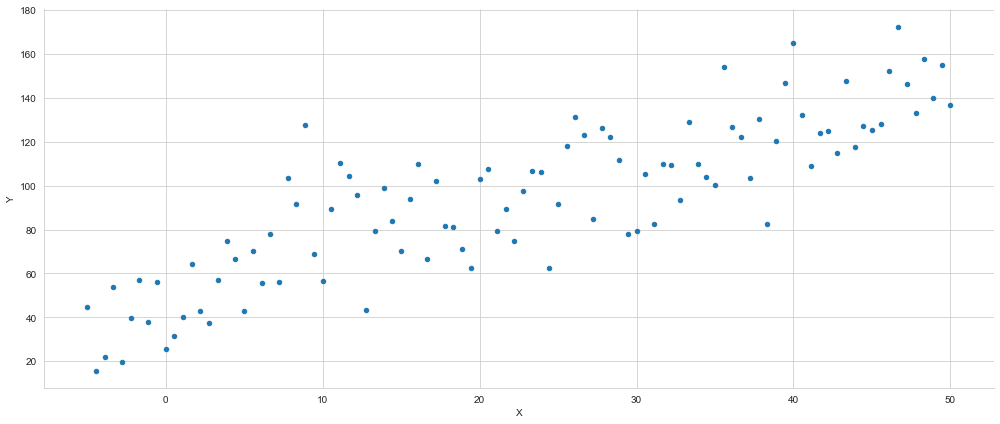

In [16]:
x = np.linspace(-5,50,100)
y = 50 + 2*x + np.random.normal(0,20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14,6))
sns.despine()
plt.tight_layout()

In [19]:
data['X']
data['Y']

0     44.65
1     15.73
2     22.11
3     53.91
4     19.74
      ...  
95   133.16
96   157.59
97   139.96
98   154.82
99   136.95
Name: Y, Length: 100, dtype: float64

In [21]:
X = stats.add_constant(data['X'])
X

,const,X
0,1.00,-5.00
1,1.00,-4.44
2,1.00,-3.89
3,1.00,-3.33
4,1.00,-2.78
...,...,...
95,1.00,47.78
96,1.00,48.33
97,1.00,48.89
98,1.00,49.44


In [23]:
model = stats.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     253.9
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           5.86e-29
Time:                        17:16:49   Log-Likelihood:                -435.93
No. Observations:                 100   AIC:                             875.9
Df Residuals:                      98   BIC:                             881.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.4021      3.293     15.608      0.0

In [25]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([51.4020502 ,  1.89939194])

In [28]:
pd.Series(beta, index=X.columns)

const   51.40
X        1.90
dtype: float64

In [30]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
data

,X,Y,y-hat,residuals
0,-5.00,44.65,41.91,2.75
1,-4.44,15.73,42.96,-27.23
2,-3.89,22.11,44.02,-21.90
3,-3.33,53.91,45.07,8.84
4,-2.78,19.74,46.13,-26.39
...,...,...,...,...
95,47.78,133.16,142.15,-8.99
96,48.33,157.59,143.21,14.38
97,48.89,139.96,144.26,-4.30
98,49.44,154.82,145.32,9.50


<AxesSubplot:xlabel='X', ylabel='Y'>

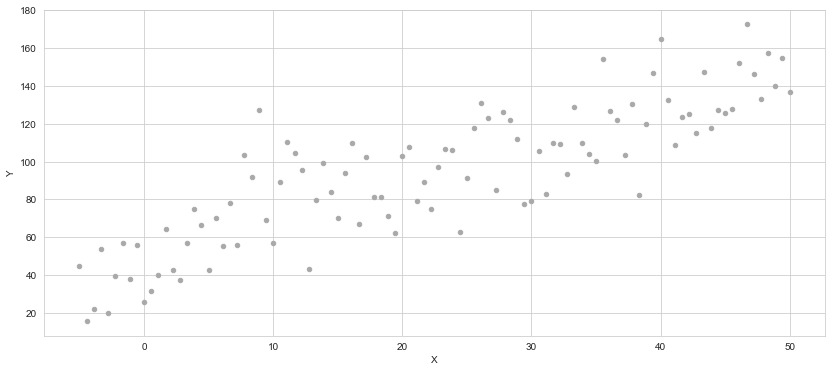

In [31]:
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
ax

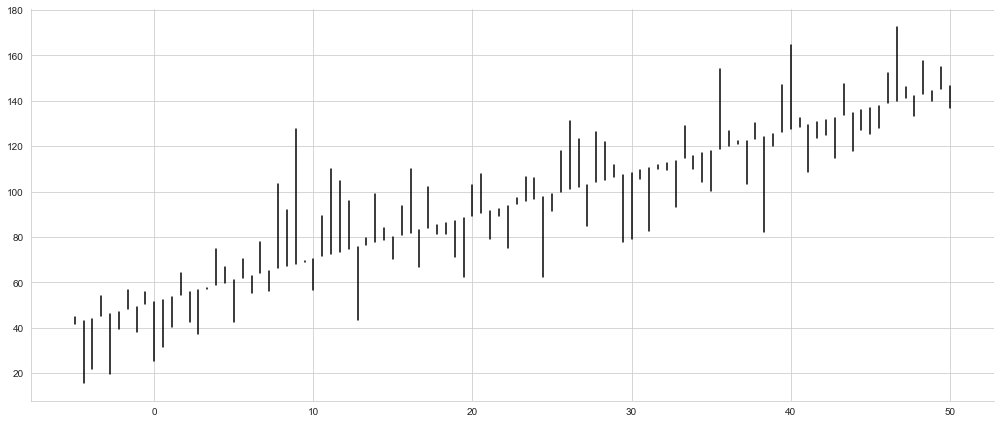

In [38]:
data.plot.scatter(x='X', y='y-hat', ax=ax)
plt.figure(figsize=(14,6))
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')  
sns.despine()
plt.tight_layout();

In [59]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X_

array([[ 0.        , -1.71481604],
       [ 0.        , -1.68017329],
       [ 0.        , -1.64553055],
       [ 0.        , -1.6108878 ],
       [ 0.        , -1.57624505],
       [ 0.        , -1.5416023 ],
       [ 0.        , -1.50695955],
       [ 0.        , -1.4723168 ],
       [ 0.        , -1.43767406],
       [ 0.        , -1.40303131],
       [ 0.        , -1.36838856],
       [ 0.        , -1.33374581],
       [ 0.        , -1.29910306],
       [ 0.        , -1.26446031],
       [ 0.        , -1.22981757],
       [ 0.        , -1.19517482],
       [ 0.        , -1.16053207],
       [ 0.        , -1.12588932],
       [ 0.        , -1.09124657],
       [ 0.        , -1.05660382],
       [ 0.        , -1.02196108],
       [ 0.        , -0.98731833],
       [ 0.        , -0.95267558],
       [ 0.        , -0.91803283],
       [ 0.        , -0.88339008],
       [ 0.        , -0.84874733],
       [ 0.        , -0.81410459],
       [ 0.        , -0.77946184],
       [ 0.        ,

In [43]:
sgd = SGDRegressor(
    
    loss='squared_error',
    fit_intercept=True,
    shuffle=True,
    random_state=42,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25
)

sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

In [61]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
print(scaler.scale_, scaler.mean_)
coeffs

[ 1.         16.03670558] [ 1.  22.5]


array([  1.        , 510.59156876])

In [52]:
pd.Series(coeffs, index=X.columns)

const     1.00
X       510.59
dtype: float64

In [53]:
resids = pd.DataFrame(
    
    {
        'sgd': y - sgd.predict(X_),
        'ols': y - model.predict(X)
    }   
)
resids

,sgd,ols
0,2.72,2.75
1,-27.26,-27.23
2,-21.93,-21.90
3,8.81,8.84
4,-26.41,-26.39
...,...,...
95,-8.94,-8.99
96,14.44,14.38
97,-4.24,-4.30
98,9.56,9.50


In [54]:
resids.pow(2).sum().div(len(y)).pow(0.5)
resids

,sgd,ols
0,2.72,2.75
1,-27.26,-27.23
2,-21.93,-21.90
3,8.81,8.84
4,-26.41,-26.39
...,...,...
95,-8.94,-8.99
96,14.44,14.38
97,-4.24,-4.30
98,9.56,9.50


<Figure size 1008x432 with 0 Axes>

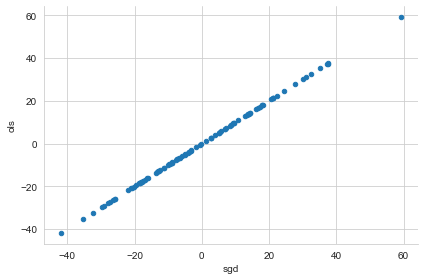

In [58]:
plt.figure(figsize=(14,6))
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout()